In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
train =pd.read_csv('sat/train.csv')
test = pd.read_csv('sat/test.csv')

#从csv文件中载入数据

In [3]:
train = np.array(train)
test = np.array(test)
#转换数组

In [4]:
train_images=train[:,1:]
test_images=test[:,1:]

#提取图片信息 28*28

In [5]:
train_labels=train[:,:1]
test_labels=test[:,:1]

#提取标签信息 1

In [6]:
train_images.shape

(68161, 784)

In [7]:
train_labels.shape

(68161, 1)

In [8]:
train_labels = train_labels.reshape(68161)
test_labels = test_labels.reshape(8529)

train_images = train_images.reshape(68161,28,28)
test_images = test_images.reshape(8529,28,28)

#初始化维度

In [9]:
train_images.shape

(68161, 28, 28)

In [10]:
train_labels.shape

(68161,)

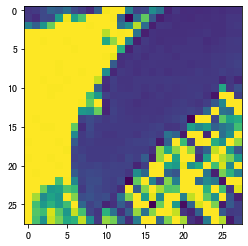

In [11]:
plt.imshow(train_images[100])

In [12]:
train_images = train_images.reshape(68161,28,28,1)
test_images = test_images.reshape(8529,28,28,1)
#增加维度，用于卷积操作

In [13]:
train_images = train_images / 255
test_images = test_images/ 255
#归一化

In [14]:
train_labels = np.array(pd.get_dummies(train_labels))
test_labels = np.array(pd.get_dummies(test_labels))
#独热编码

In [15]:
model = tf.keras.Sequential()

In [16]:
model.add(tf.keras.layers.Conv2D(filters = 6,kernel_size = (5,5),input_shape=(28,28,1),padding = 'same',activation = "sigmoid"))
model.add(tf.keras.layers.AveragePooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Conv2D(filters = 16,kernel_size = (5,5),activation = "sigmoid"))
model.add(tf.keras.layers.AveragePooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Conv2D(filters = 120,kernel_size = (5,5),activation = "sigmoid"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [21]:
history = model.fit(train_images,train_labels,epochs = 30,validation_data=(test_images,test_labels))

Epoch 1/30
2131/2131 [==============================] - 5s 2ms/step - loss: 0.8576 - acc: 0.6965 - val_loss: 0.8895 - val_acc: 0.6946
Epoch 2/30
2131/2131 [==============================] - 5s 2ms/step - loss: 0.8160 - acc: 0.7128 - val_loss: 0.8974 - val_acc: 0.6955
Epoch 3/30
2131/2131 [==============================] - 6s 3ms/step - loss: 0.7783 - acc: 0.7265 - val_loss: 0.8040 - val_acc: 0.7272
Epoch 4/30
2131/2131 [==============================] - 5s 2ms/step - loss: 0.7450 - acc: 0.7379 - val_loss: 0.7705 - val_acc: 0.7376
Epoch 5/30
2131/2131 [==============================] - 4s 2ms/step - loss: 0.7140 - acc: 0.7483 - val_loss: 0.7582 - val_acc: 0.7324
Epoch 6/30
2131/2131 [==============================] - 4s 2ms/step - loss: 0.6826 - acc: 0.7602 - val_loss: 0.7353 - val_acc: 0.7448
Epoch 7/30
2131/2131 [==============================] - 4s 2ms/step - loss: 0.6577 - acc: 0.7693 - val_loss: 0.7242 - val_acc: 0.7514
Epoch 8/30
2131/2131 [==============================] - 4s 2ms

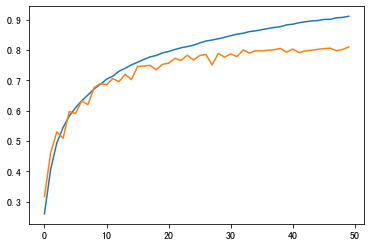

In [20]:
plt.plot(history.epoch,history.history.get('acc'))
plt.plot(history.epoch,history.history.get('val_acc'))

In [21]:
model.evaluate(test_images,test_labels)

267/267 [==============================] - 0s 1ms/step - loss: 0.7007 - acc: 0.8097


[0.7006717920303345, 0.8097080588340759]

In [22]:
# 保存模型
model.save('sat.h5')